# Aprendizaje Supervisado

En el aprendizaje de máquina, hay tres tipos de aprendizaje distintos:
* Aprendizaje Supervisado (Supervised Learning)
* Aprendizaje sin Supervisión (Unsupervised Learning)
* Aprendizaje de Refuerzo (Reinforcement Learning)


El aprendizaje supervisado es el primero que aprenderemos. Este se caracteriza por tener *labels* además de los datos, o sea, un dataset de entrenamiento que ya tenga las "respuestas".
Existen varias tareas que se pueden hacer usando aprendizaje de máquina, cada una de estas se puede hacer de forma supervisada, sin supervisión o con refuerzo. Comunmente, utilizaremos solamente seis tipos:
* Selección de características
* Clasificación
* Regresión
* Clustering
* Optimización
* Ranking

## Ejemplo simple de clasificación

Un dataset que se utiliza mucho cuando se enseña aprendizaje de máquia es el Iris Dataset: consiste de tres diferentes tipos de flores y sus características.

**Iris Setosa**

<img src="iris_setosa.jpg" width="20%">

**Iris Versicolor**
<img src="iris_versicolor.jpg" width="20%">

**Iris Virginica**
<img src="iris_virginica.jpg" width="20%">

Este dataset tiene características muy sencillas, por lo que es muy fácil de explicar y entender.

1. Las características que tiene son:
    - Longitud del sépalo en cm
    - Anchura del sépalo en cm
    - Longitud del pétalo en cm
    - Anchura del pétalo en cm


2. Y se tienen  que clasificar en tres diferentes clases:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

#### Primero tenemos que cargar los datos

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

Este es un objeto tipo `Bunch`. Se pueden ver las claves utilizando el método `keys()`.

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
len(iris.data)

150

In [5]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.data.shape

(150, 4)

Los datos tienen cuatro características (a veces se dice que tiene cuatro dimensiones), pero se pueden graficar dos de ellas para que sea más fácil visualizarlo.


sepal length (cm)
petal length (cm)


Text(0, 0.5, 'petal length (cm)')

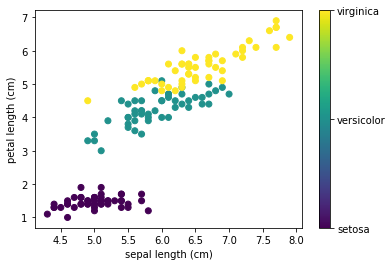

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

x_index = 0
y_index = 2

print()
print(iris.feature_names[x_index])
print(iris.feature_names[y_index])

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

Como se puede ver en la gráfica, utilizando solamente dos de las cuatro características se pueden diferenciar mucho las diferentes flores.

#### Ejercicio rápido

Cambia los números en `x_index` y en `y_index` y ve los diferentes resultados.

## Entranamiento y pruebas

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.70)

# Vamos a utilizar una variación gaussiana de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Entrenamos el modelo de Naive Bayes
#model = GaussianNB()
#model = RandomForestClassifier()
#model = KNeighborsClassifier()
models = [GaussianNB(), RandomForestClassifier(n_estimators=100), KNeighborsClassifier()]
for i in range(0, len(models)):
    models[i].fit(X_train, y_train)
#model.fit(X_train, y_train)

# Hacer las predicciones
expected = y_test
predicted = [model.predict(X_test) for model in models]

In [26]:
# Importamos  metrics de sklearn
from sklearn import metrics

# checamos cómo le fue al modelo

print(metrics.accuracy_score(expected, predicted[1]))
print(metrics.classification_report(expected, predicted[1]))
print(metrics.confusion_matrix(expected, predicted[1]))

0.9428571428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      0.97      0.91        33
           2       0.97      0.87      0.92        38

   micro avg       0.94      0.94      0.94       105
   macro avg       0.95      0.95      0.94       105
weighted avg       0.95      0.94      0.94       105

[[34  0  0]
 [ 0 32  1]
 [ 0  5 33]]


# Práctica

Vamos a utilizar lo que aprendimos hoy y en las semanas anteriores en un dataset de Kaggle. Hagan un nuevo Jupyter Notebook y utilicen Pandas y sklearn para sacar predicciones sobre los ganadores en partidos de futbol de la fifa.